In [1]:
#q3
import keras
import pandas as pd
from sklearn.datasets import load_iris
import numpy as np
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
import tensorflow as tf
import random 
from sklearn.model_selection import train_test_split
print(tf.__version__)

2.6.0


Q2

In [3]:
d1 = [1 for _ in range(100)]
d2 = [-1 for _ in range(100)]
d = np.array(d1 + d2)
d.shape

(200,)

In [4]:
cumsum = np.cumsum(d)
means = [c / (i+1) for i , c in enumerate(cumsum)]


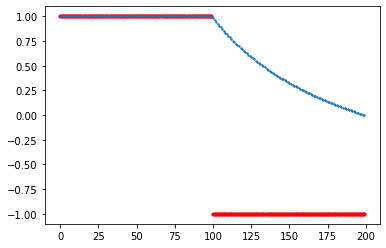

In [5]:
plt.scatter(range(len(d)), d, s = 10, color='red')
plt.scatter(range(len(means)), means, s=2)
plt.show()

In [6]:
def first_moment(vector,beta):
    first = 0
    delta_array = []
    for v in vector:
        first = (beta*first) + ((1-beta)*v)
        delta_array.append(first)
    return delta_array

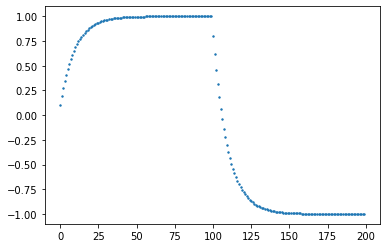

In [7]:
beta = 0.9
f = first_moment(d,beta)
plt.scatter(range(len(f)), f, s=2)
plt.show()

In [8]:
def second_moment(vector,first_moment,beta):
    delta_array = [0]
    delta_array.extend(m1 / (1 - np.power(beta, t)) for t, m1 in enumerate(first_moment))
    return delta_array

C:\Users\Parsian-PC\AppData\Local\Temp\ipykernel_24136\2199186685.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  delta_array.extend(m1 / (1 - np.power(beta, t)) for t, m1 in enumerate(first_moment))


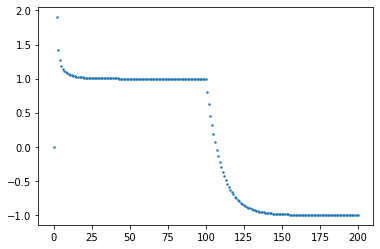

In [9]:
s = second_moment(d,first_moment(d,beta),beta)
plt.scatter(range(len(s)), s, s=2)
plt.show()

In [10]:
beta = 0.999
s_2 = second_moment(d,first_moment(d,0.9),beta)
f_2 = first_moment(d,beta)

C:\Users\Parsian-PC\AppData\Local\Temp\ipykernel_24136\2199186685.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  delta_array.extend(m1 / (1 - np.power(beta, t)) for t, m1 in enumerate(first_moment))


<function matplotlib.pyplot.show(close=None, block=None)>

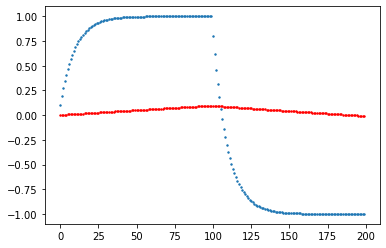

In [11]:
plt.scatter(range(len(f_2)), f_2, s=2, color='red')
plt.scatter(range(len(f)), f, s=2)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

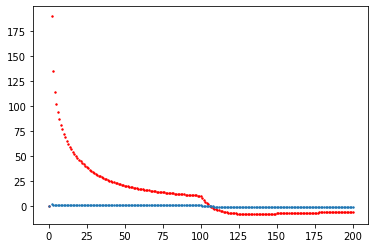

In [12]:
plt.scatter(range(len(s_2)), s_2, s=2, color='red')
plt.scatter(range(len(s)), s, s=2)
plt.show

Q3

In [ ]:
# train = pd.read_csv(r"fashion-mnist_train.csv",dtype = np.float32)
# test = pd.read_csv(r"fashion-mnist_test.csv",dtype = np.float32)

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(features_train, targets_train), (features_test, targets_test) = fashion_mnist.load_data()

In [5]:
features_test.shape

(10000, 28, 28)

In [ ]:
# targets_train = train.label.values
# features_train = train.loc[:,train.columns != "label"].values/255.0
# targets_test = test.label.values
# features_test = test.loc[:,train.columns != "label"].values/255.0

In [14]:
features_train = features_train/255.0
features_test = features_test/255.0

In [23]:
# features_train_valid, features_test_valid, targets_train_valid, targets_test_valid = train_test_split(features_train,
#                                                                              targets_train,
#                                                                              test_size = 0.1,
#                                                                              random_state = 42)

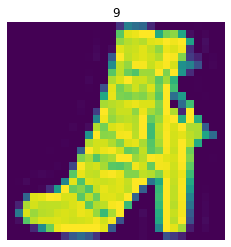

In [6]:
plt.imshow(features_train[11].reshape(28,28))
plt.axis("off")
plt.title(str(targets_train[11]))
plt.savefig('graph.png')
plt.show()

In [7]:

def model(lr, nNeurons, validation_split,optimizer=tf.keras.optimizers.SGD,epochs=50,verbose=1):
  np.random.seed(42)
  tf.random.set_seed(42)
  random.seed(42)
  model = tf.keras.models.Sequential([
                                  tf.keras.layers.Flatten(input_shape=(28, 28)),
                                  tf.keras.layers.Dense(nNeurons, activation='relu'),
                                  tf.keras.layers.Dense(10, activation='softmax')])
  model.compile(
  optimizer=optimizer(learning_rate=lr),
  loss=tf.keras.losses.SparseCategoricalCrossentropy(),
  metrics=['accuracy']
  )
  history = model.fit(
  features_train, targets_train, epochs=epochs,
  validation_split=validation_split, verbose=verbose
  )
  test_loss, test_acc = model.evaluate(features_test, targets_test, verbose=verbose)
  return test_loss,test_acc, history


In [8]:
def plot(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

In [9]:
def find_best(lr,nNeurons = [16,32,64,128],validation_split=0.1,show=True):
    print(f"validation_split: {validation_split}")
    print(f"learning rate = {lr}")
    print("********************************************")
    val_losses = []
    for n in nNeurons:
        print(f"# hidden layer = {n}")
        test_loss, test_acc, history = model(lr=lr,nNeurons=n, validation_split=validation_split,verbose=0)
        print(f"test loss: {test_loss}")
        print(f"validation loss: {history.history['val_loss'][-1]}")
        if show:
            plot(history)
        print()
        val_losses.append(history.history['val_loss'][-1])


    val_losses = np.array(val_losses)
    best_with_min_validloss = nNeurons[np.argmin(val_losses)]
    return best_with_min_validloss

validation_split: 0.1
learning rate = 0.001
********************************************
# hidden layer = 16
test loss: 0.47793740034103394
validation loss: 0.44793590903282166


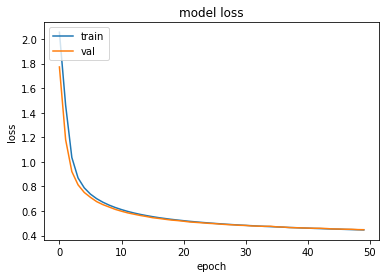


# hidden layer = 32
test loss: 0.47026968002319336
validation loss: 0.4398651123046875


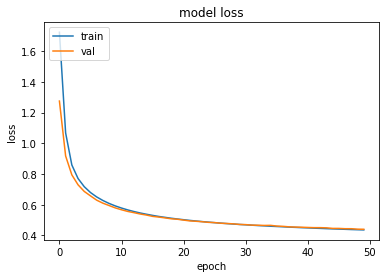


# hidden layer = 64
test loss: 0.4568256735801697
validation loss: 0.4270664155483246


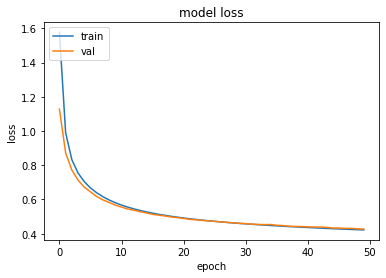


# hidden layer = 128
test loss: 0.4480528235435486
validation loss: 0.4172268509864807


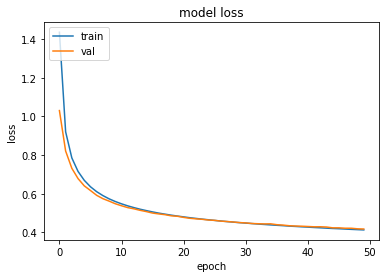


-----------------------------------
best # neurons: 128
-----------------------------------


In [49]:
best=find_best(lr=0.001)
print("-----------------------------------")
print(f"best # neurons: {best}")
print("-----------------------------------")

In [50]:
best_1=find_best(lr=0.001,validation_split=0.3,show=False)
print("-----------------------------------")
print(f"best # neurons: {best}")
print("-----------------------------------")
best_2=find_best(lr=0.001,validation_split=0.6,show=False)
print("-----------------------------------")
print(f"best # neurons: {best}")
print("-----------------------------------")


validation_split: 0.3
learning rate = 0.001
********************************************
# hidden layer = 16
test loss: 0.4962080121040344
validation loss: 0.472622275352478

# hidden layer = 32
test loss: 0.4866633713245392
validation loss: 0.46280279755592346

# hidden layer = 64
test loss: 0.47422459721565247
validation loss: 0.45033565163612366

# hidden layer = 128
test loss: 0.466568261384964
validation loss: 0.44258853793144226

-----------------------------------
best # neurons: 128
-----------------------------------
validation_split: 0.6
learning rate = 0.001
********************************************
# hidden layer = 16
test loss: 0.5377460718154907
validation loss: 0.5157687067985535

# hidden layer = 32
test loss: 0.5246440172195435
validation loss: 0.49957677721977234

# hidden layer = 64
test loss: 0.5152828693389893
validation loss: 0.4904123842716217

# hidden layer = 128
test loss: 0.5048978328704834
validation loss: 0.47943076491355896

----------------------------

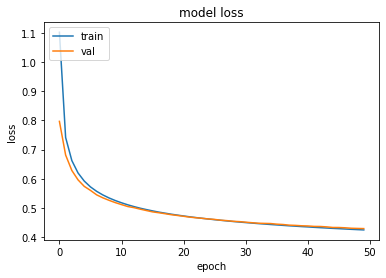

adagrad acc = 0.8409000039100647 --- adagrad loss = 0.4590959846973419
-------------------------------------------------------------


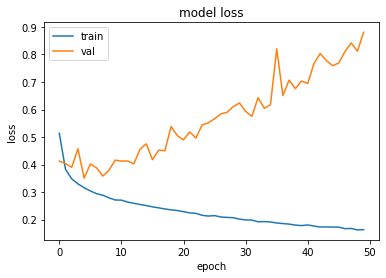

RMSprop acc = 0.8797000050544739 --- RMSprop loss = 0.840690016746521
-------------------------------------------------------------


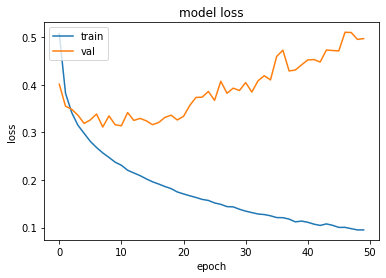

Adam acc = 0.8878999948501587 --- Adam loss = 0.5265015363693237
-------------------------------------------------------------


In [51]:
test_loss, test_acc, history = model(lr=0.001,nNeurons=128, validation_split=0.1,optimizer=tf.keras.optimizers.Adagrad,verbose=0)
plot(history)
print(f"adagrad acc = {test_acc} --- adagrad loss = {test_loss}")
print("-------------------------------------------------------------")
test_loss, test_acc, history = model(lr=0.001,nNeurons=128, validation_split=0.1,optimizer=tf.keras.optimizers.RMSprop,verbose=0)
plot(history)
print(f"RMSprop acc = {test_acc} --- RMSprop loss = {test_loss}")
print("-------------------------------------------------------------")
test_loss, test_acc, history = model(lr=0.001,nNeurons=128, validation_split=0.1,optimizer=tf.keras.optimizers.Adam,verbose=0)
plot(history)
print(f"Adam acc = {test_acc} --- Adam loss = {test_loss}")
print("-------------------------------------------------------------")

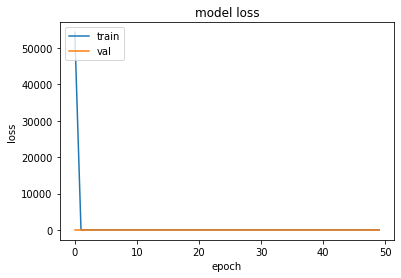

lr: 0.1 - test_loss: 2.3377811908721924 - test_acc = 0.10000000149011612
-------------------------------------------------------------


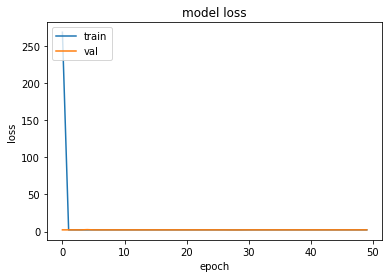

lr: 0.01 - test_loss: 2.3049395084381104 - test_acc = 0.10019999742507935
-------------------------------------------------------------


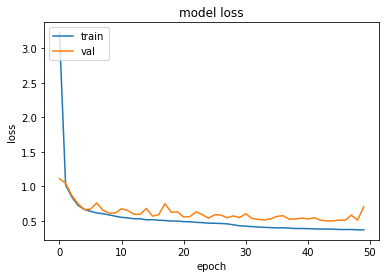

lr: 0.001 - test_loss: 0.6842299699783325 - test_acc = 0.777899980545044
-------------------------------------------------------------


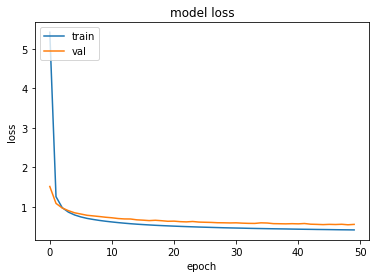

lr: 0.0001 - test_loss: 0.5822184681892395 - test_acc = 0.819100022315979
-------------------------------------------------------------


In [15]:
for lr in [0.1, 0.01, 0.001, 0.0001]:
  test_loss, test_acc, history = model(lr=lr,nNeurons=128, validation_split=0.1,optimizer=tf.keras.optimizers.SGD,verbose=0)
  plot(history)
  print(f"lr: {lr} - test_loss: {test_loss} - test_acc = {test_acc}")
  print("-------------------------------------------------------------")

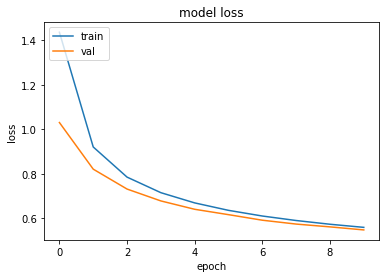

In [54]:
  test_loss, test_acc, history = model(lr=0.001,nNeurons=128, validation_split=0.1,optimizer=tf.keras.optimizers.SGD, epochs=10,verbose=0)
  plot(history)

In [12]:
# classifications = model.predict(features_test)
test_loss, test_acc, history = model(lr=0.001,nNeurons=128, validation_split=0.1,optimizer=tf.keras.optimizers.SGD, epochs=50,verbose=1)


Epoch 1/50
1688/1688 [==============================] - 2s 871us/step - loss: 3.2318 - accuracy: 0.5627 - val_loss: 1.1105 - val_accuracy: 0.6705
Epoch 2/50
1688/1688 [==============================] - 1s 760us/step - loss: 1.0183 - accuracy: 0.6865 - val_loss: 1.0422 - val_accuracy: 0.6522
Epoch 3/50
1688/1688 [==============================] - 1s 740us/step - loss: 0.8433 - accuracy: 0.7081 - val_loss: 0.8646 - val_accuracy: 0.7037
Epoch 4/50
1688/1688 [==============================] - 1s 768us/step - loss: 0.7219 - accuracy: 0.7196 - val_loss: 0.7458 - val_accuracy: 0.7013
Epoch 5/50
1688/1688 [==============================] - 1s 777us/step - loss: 0.6640 - accuracy: 0.7334 - val_loss: 0.6611 - val_accuracy: 0.7392
Epoch 6/50
1688/1688 [==============================] - 1s 759us/step - loss: 0.6360 - accuracy: 0.7377 - val_loss: 0.6669 - val_accuracy: 0.7470
Epoch 7/50
1688/1688 [==============================] - 1s 761us/step - loss: 0.6128 - accuracy: 0.7451 - val_loss: 0.7573 -

In [ ]:
# print(classifications[0])
# print(targets_test[0])